# Data visualization in Python (`pyplot`)

## Looking ahead: April, Weeks 1-2

- In April, weeks 1-2, we'll dive deep into **data visualization**.  
  - How do we make visualizations in Python?
  - What principles should we keep in mind?

## Goals of this exercise

- What *is* data visualization and why is it important?
- Introducing `matplotlib`.
- Univariate plot types:
  - **Histograms** (univariate).
  - **Scatterplots** (bivariate).
  - **Bar plots** (bivariate).

## Introduction: data visualization

### What is data visualization?

[Data visualization](https://en.wikipedia.org/wiki/Data_visualization) refers to the process (and result) of representing data graphically.

For our purposes today, we'll be talking mostly about common methods of **plotting** data, including:

- Histograms  
- Scatterplots  
- Line plots
- Bar plots

### Why is data visualization important?

- Exploratory data analysis
- Communicating insights
- Impacting the world

### Exploratory Data Analysis: Checking your assumptions 

[Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![title](img/anscombe.png)

### Communicating Insights

[Reference: Full Stack Economics](https://fullstackeconomics.com/18-charts-that-explain-the-american-economy/)

![title](img/work.png)

### Impacting the world

[Florence Nightingale](https://en.wikipedia.org/wiki/Florence_Nightingale) (1820-1910) was a social reformer, statistician, and founder of modern nursing.

![title](img/polar.jpeg)

### Impacting the world (pt. 2)

[John Snow](https://en.wikipedia.org/wiki/John_Snow) (1813-1858) was a physician whose visualization of cholera outbreaks helped identify the source and spreading mechanism (water supply). 

![title](img/cholera.jpeg)

## Introducing `matplotlib`

### Loading packages

Here, we load the core packages we'll be using. 

We also add some lines of code that make sure our visualizations will plot "inline" with our code, and that they'll have nice, crisp quality.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### What is `matplotlib`?

> [`matplotlib`](https://matplotlib.org/) is a **plotting library** for Python.

- Many [tutorials](https://matplotlib.org/stable/tutorials/index.html) available online.  
- Also many [examples](https://matplotlib.org/stable/gallery/index) of `matplotlib` in use.

Note that [`seaborn`](https://seaborn.pydata.org/) (which we'll cover soon) uses `matplotlib` "under the hood".

### What is `pyplot`?

> [`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) is a collection of functions *within* `matplotlib` that make it really easy to plot data.

With `pyplot`, we can easily plot things like:

- Histograms (`plt.hist`)
- Scatterplots (`plt.scatter`)
- Line plots (`plt.plot`) 
- Bar plots (`plt.bar`)

### Example dataset

Let's load our familiar Pokemon dataset, which can be found in `data/pokemon.csv`.

In [4]:
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


## Histograms

### What are histograms?

> A **histogram** is a visualization of a single continuous, quantitative variable (e.g., income or temperature). 

- Histograms are useful for looking at how a variable **distributes**.  
- Can be used to determine whether a distribution is **normal**, **skewed**, or **bimodal**.

A histogram is a **univariate** plot, i.e., it displays only a single variable.

### Histograms in `matplotlib`

To create a histogram, call `plt.hist` with a **single column** of a `DataFrame` (or a `numpy.ndarray`).

**Check-in**: What is this graph telling us?

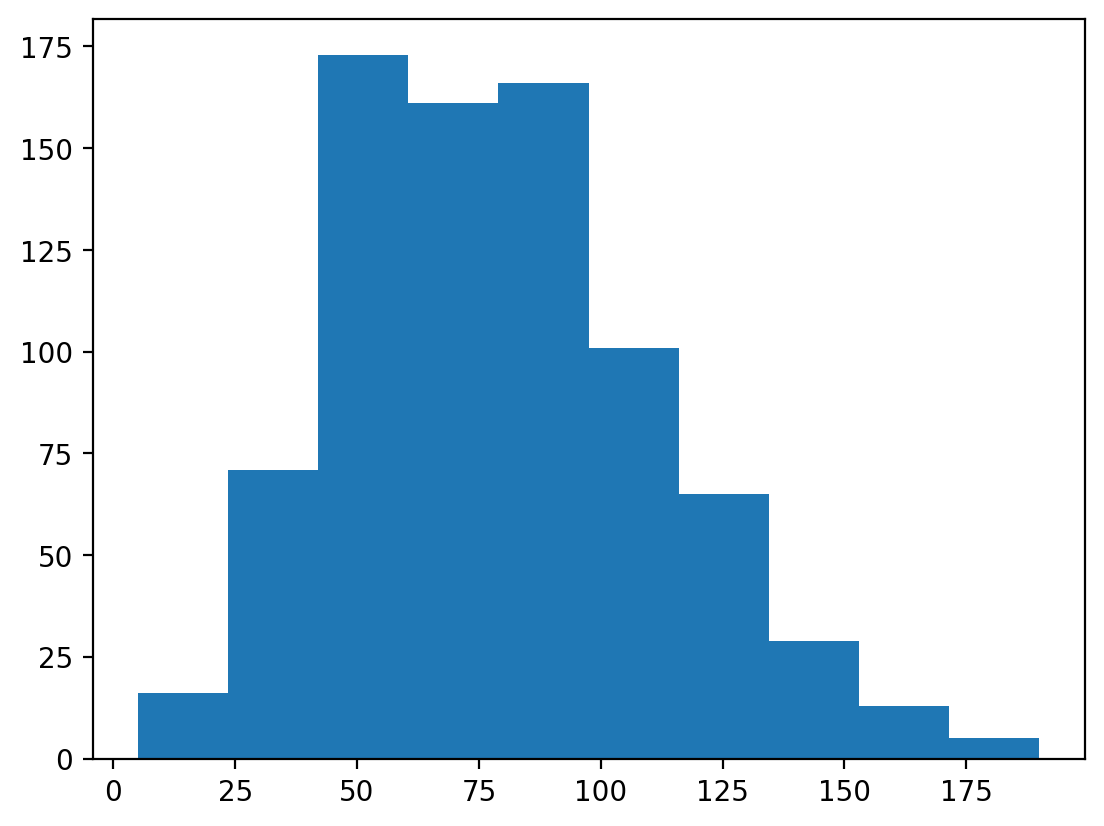

In [5]:
p = plt.hist(df_pokemon['Attack'])

#### Changing the number of bins

A histogram puts your continuous data into **bins** (e.g., 1-10, 11-20, etc.).

- The height of each bin reflects the number of observations within that interval.  
- Increasing or decreasing the number of bins gives you more or less granularity in your distribution.

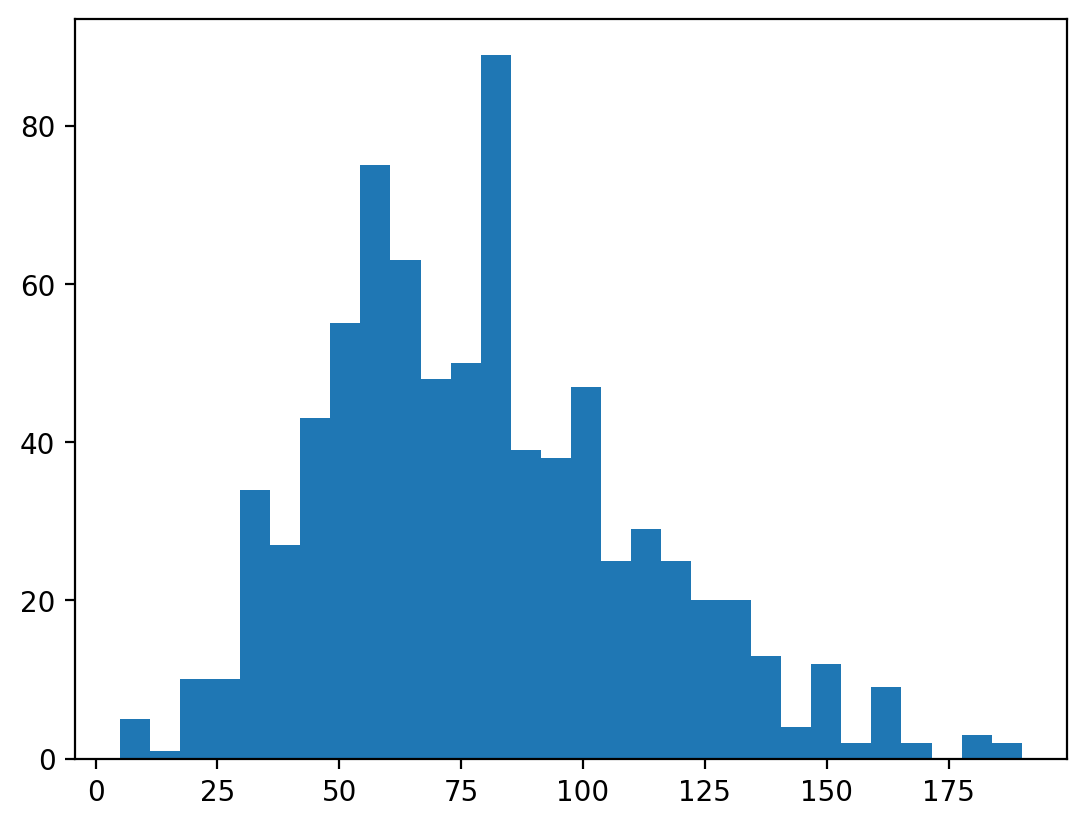

In [6]:
### This has lots of bins
p = plt.hist(df_pokemon['Attack'], bins = 30)

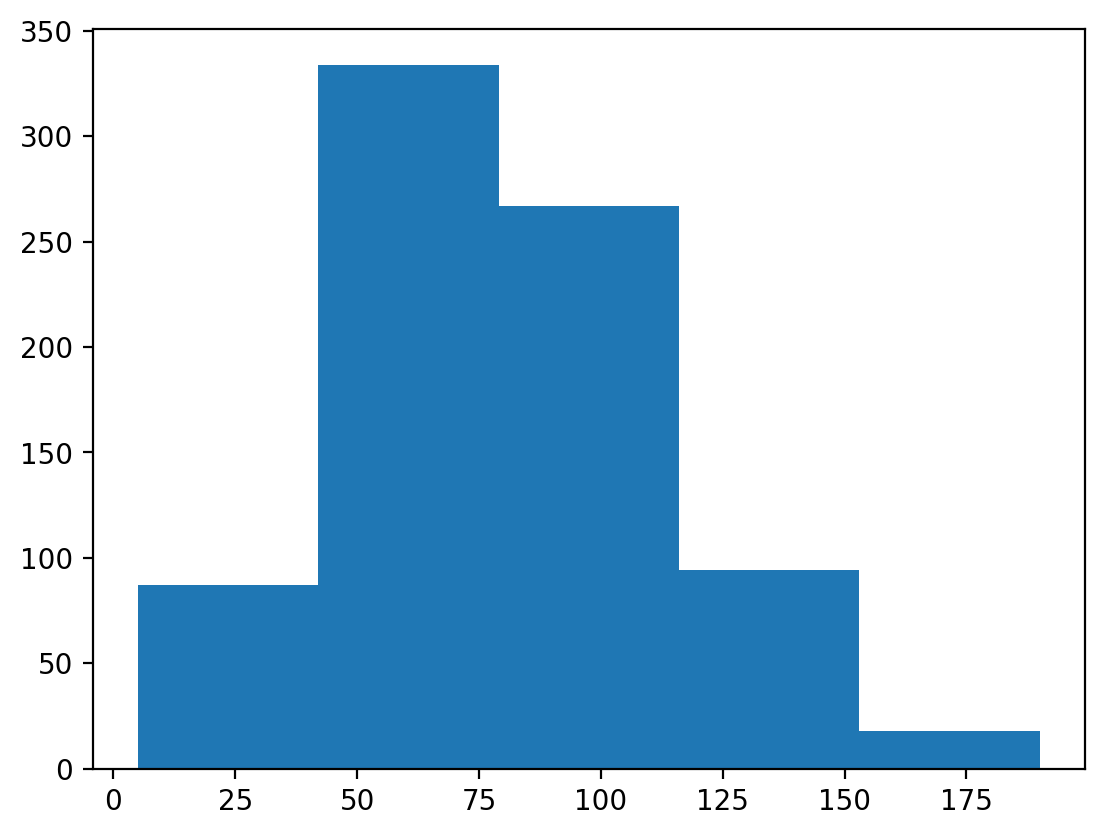

In [7]:
### This has fewer bins
p = plt.hist(df_pokemon['Attack'], bins = 5)

#### Changing the `alpha` level

The `alpha` level changes the **transparency** of your figure.

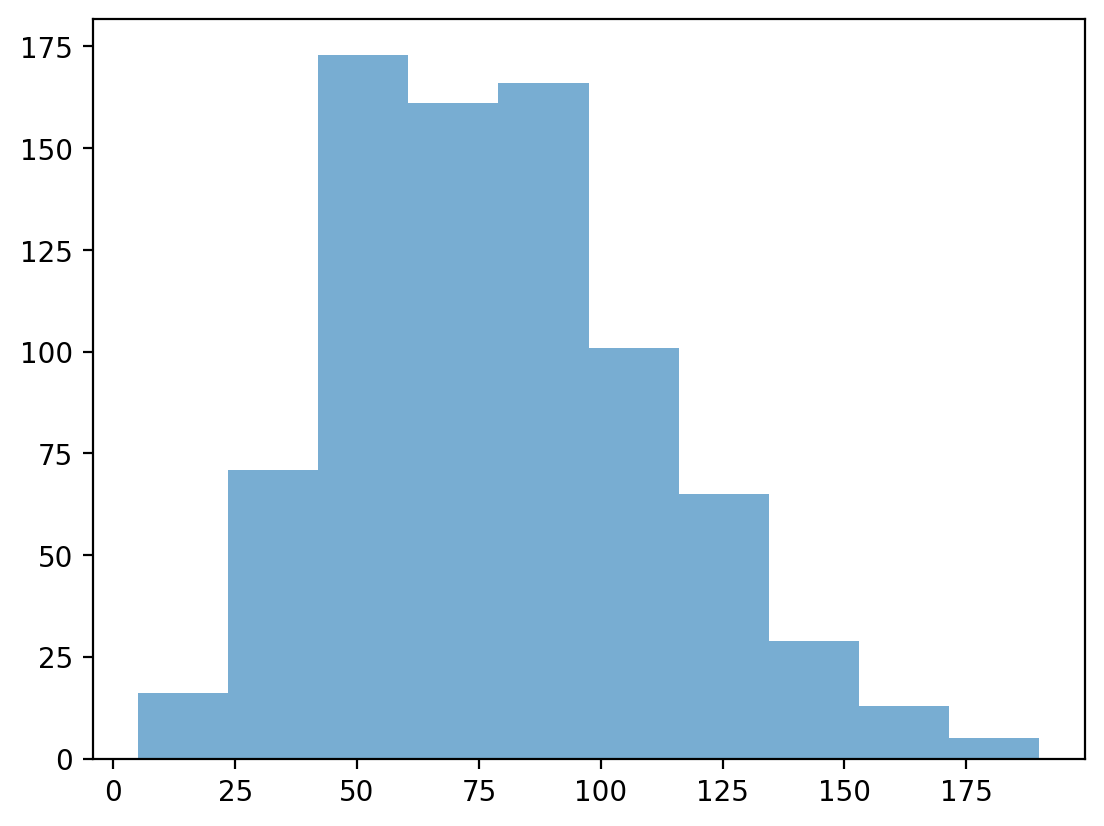

In [8]:
### This has fewer bins
p = plt.hist(df_pokemon['Attack'], alpha = .6)

#### Check-in:

How would you make a histogram of the scores for `Defense`?

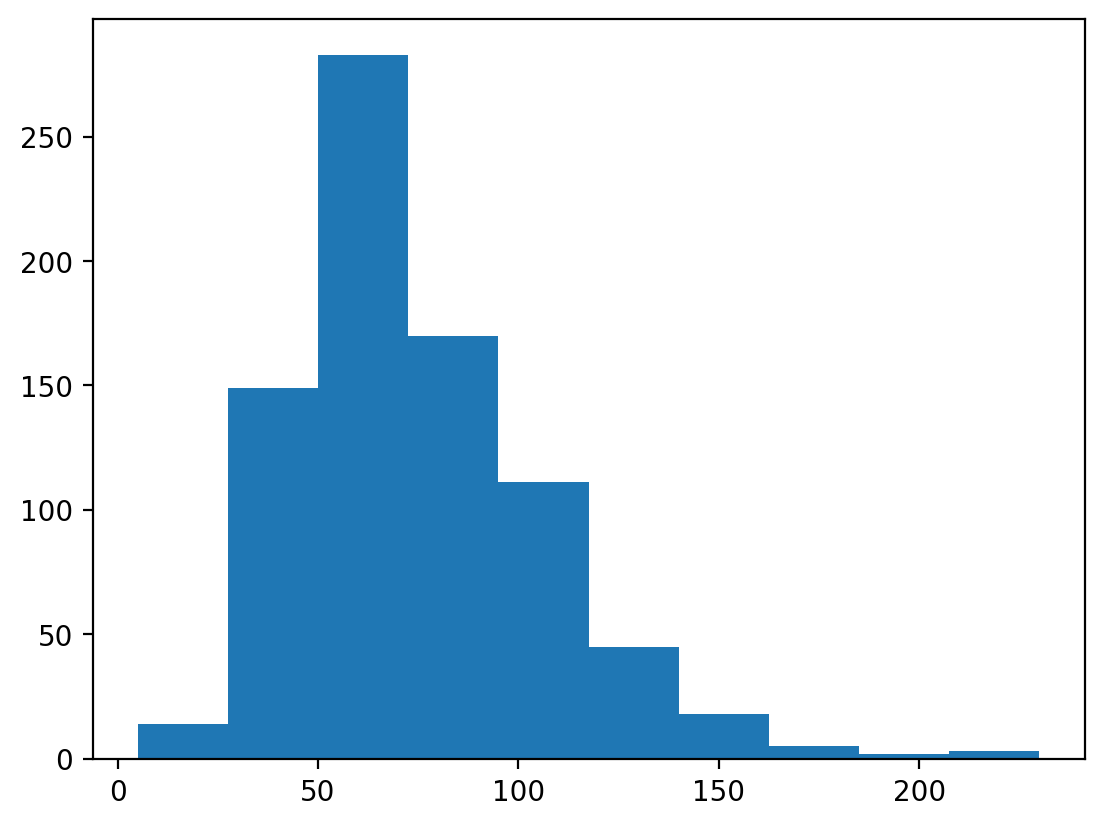

In [9]:
### Your code here
p = plt.hist(df_pokemon['Defense'])

#### Check-in:

Could you make a histogram of the scores for `Type 1`?

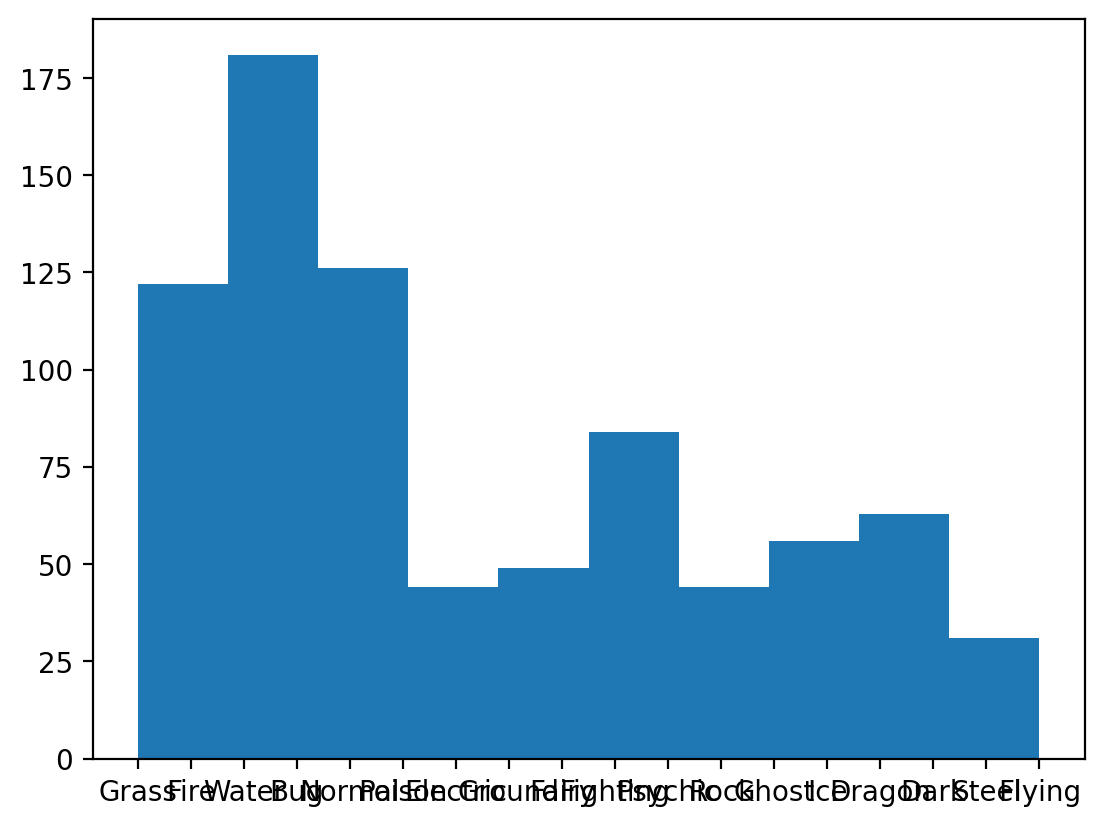

In [10]:
### Your code here
p = plt.hist(df_pokemon['Type 1'])

### Learning from histograms

Histograms are incredibly useful for learning about the **shape** of our distribution. We can ask questions like:

- Is this distribution relatively [normal](https://en.wikipedia.org/wiki/Normal_distribution)?
- Is the distribution [skewed](https://en.wikipedia.org/wiki/Skewness)?
- Are there [outliers](https://en.wikipedia.org/wiki/Outlier)?

#### Normally distributed data

We can use the `numpy.random.normal` function to create a **normal distribution**, then plot it.

A normal distribution has the following characteristics:

- Classic "bell" shape (**symmetric**).  
- Mean, median, and mode are all identical.

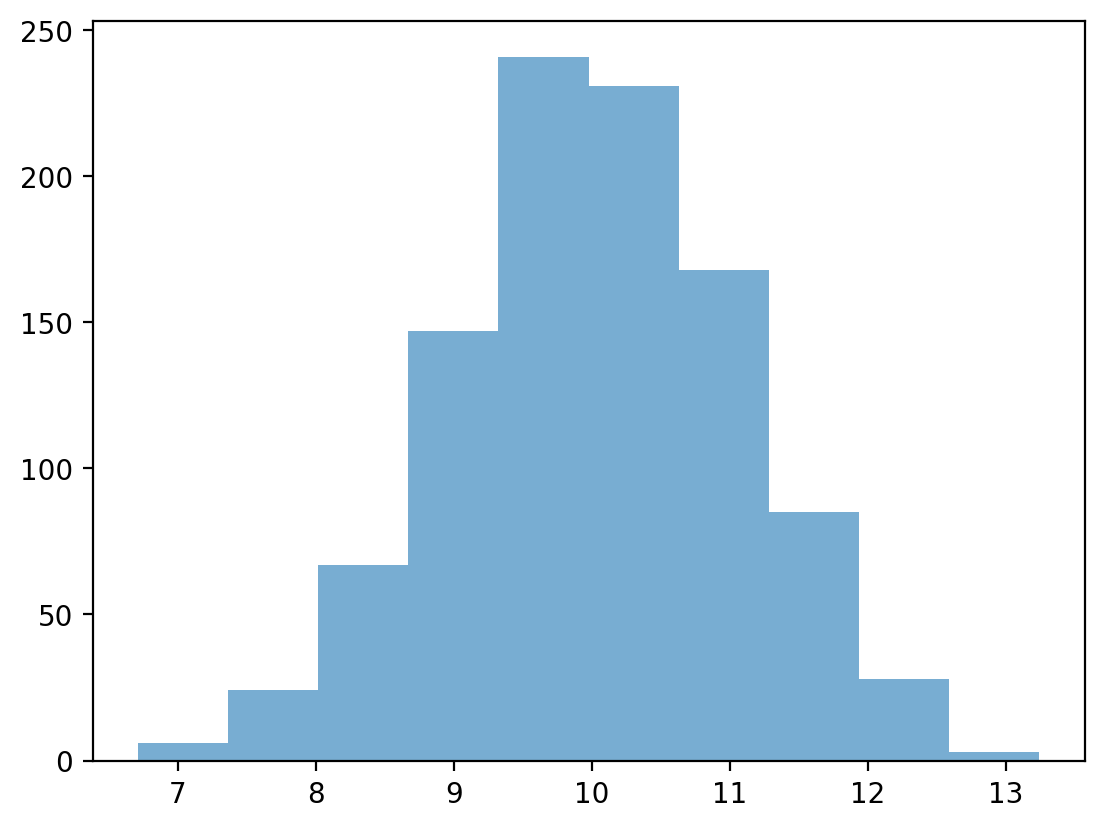

In [11]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
p = plt.hist(norm, alpha = .6)

#### Skewed data

> **Skew** means there are values *elongating* one of the "tails" of a distribution.

- Positive/right skew: the tail is pointing to the right.  
- Negative/left skew: the tail is pointing to the left.

Text(0.5, 1.0, 'Left-skewed')

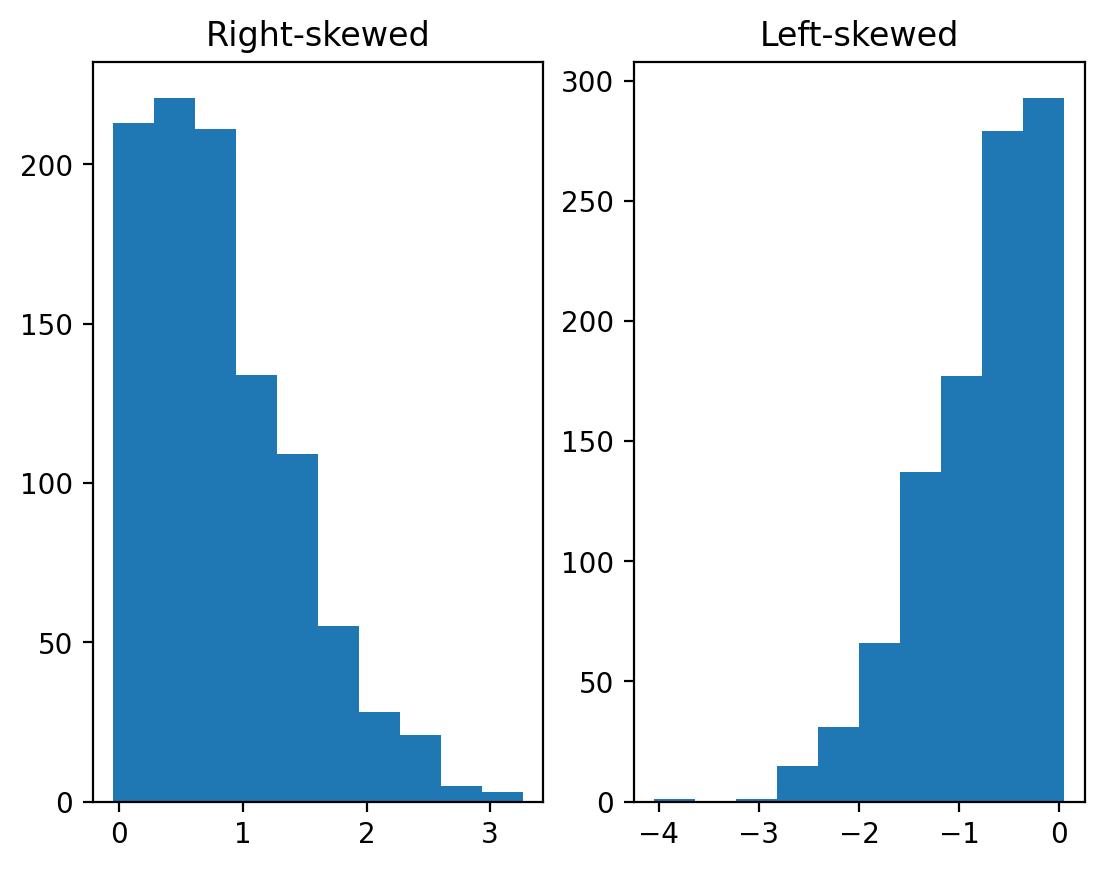

In [12]:
rskew = ss.skewnorm.rvs(20, size = 1000) # make right-skewed data
lskew = ss.skewnorm.rvs(-20, size = 1000) # make left-skewed data
fig, axes = plt.subplots(1, 2)
axes[0].hist(rskew)
axes[0].set_title("Right-skewed")
axes[1].hist(lskew)
axes[1].set_title("Left-skewed")

#### Outliers

> **Outliers** are data points that differ significantly from other points in a distribution.

- Unlike skewed data, outliers are generally **discontinuous** with the rest of the distribution.
- Next week, we'll talk about more ways to **identify** outliers; for now, we can rely on histograms.

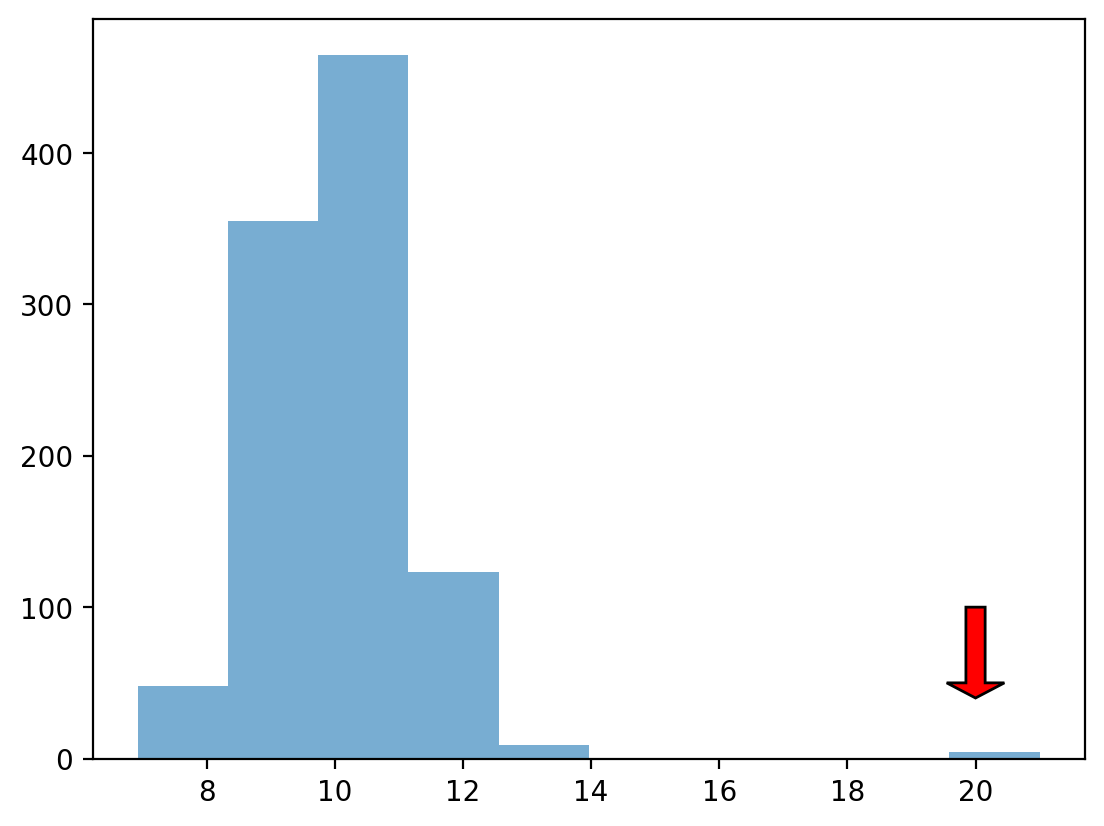

In [13]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
upper_outliers = np.array([21, 21, 21, 21]) ## some random outliers
data = np.concatenate((norm, upper_outliers))
p = plt.hist(data, alpha = .6)
plt.arrow(20, 100, dx = 0, dy = -50, width = .3, head_length = 10, facecolor = "red")

#### Check-in

How would you describe the following distribution?

- Normal vs. skewed?  
- With or without outliers?

In [14]:
### Your code here

#### Check-in

How would you describe the following distribution?

- Normal vs. skewed?  
- With or without outliers?

In [15]:
### Your code here

#### Check-in

In a somewhat **right-skewed distribution** (like below), what's larger––the `mean` or the `median`?

In [16]:
mean1=np.mean(data)
median1=np.median(data)
print(mean1)
print(median1)

10.050772242977596
10.004050755119838


### Modifying our plot

- A good data visualization should also make it *clear* what's being plotted.
   - Clearly labeled `x` and `y` axes, title.
- Sometimes, we may also want to add **overlays**. 
   - E.g., a dashed vertical line representing the `mean`.

#### Adding axis labels

Text(0.5, 1.0, 'Distribution of Attack Scores')

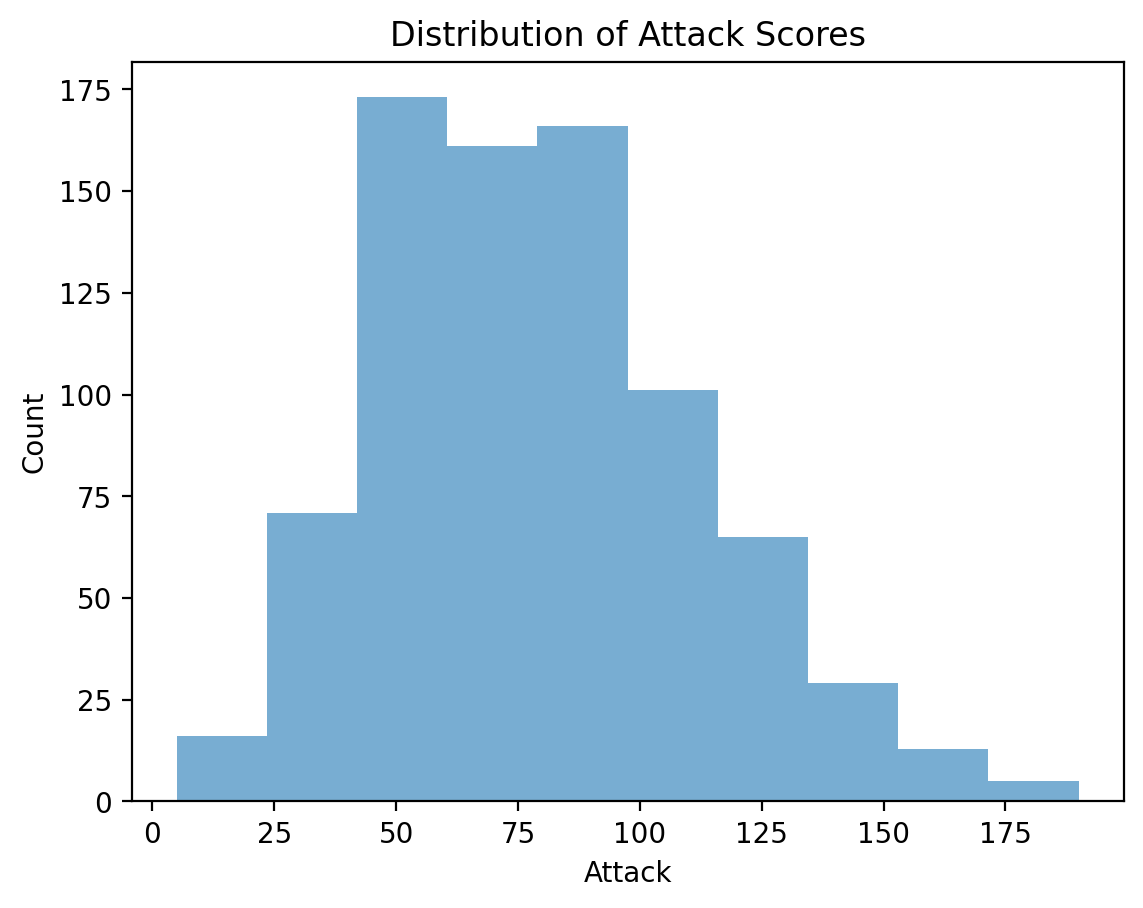

In [17]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Distribution of Attack Scores")

#### Adding a vertical line

The `plt.axvline` function allows us to draw a vertical line at a particular position, e.g., the `mean` of the `Attack` column.

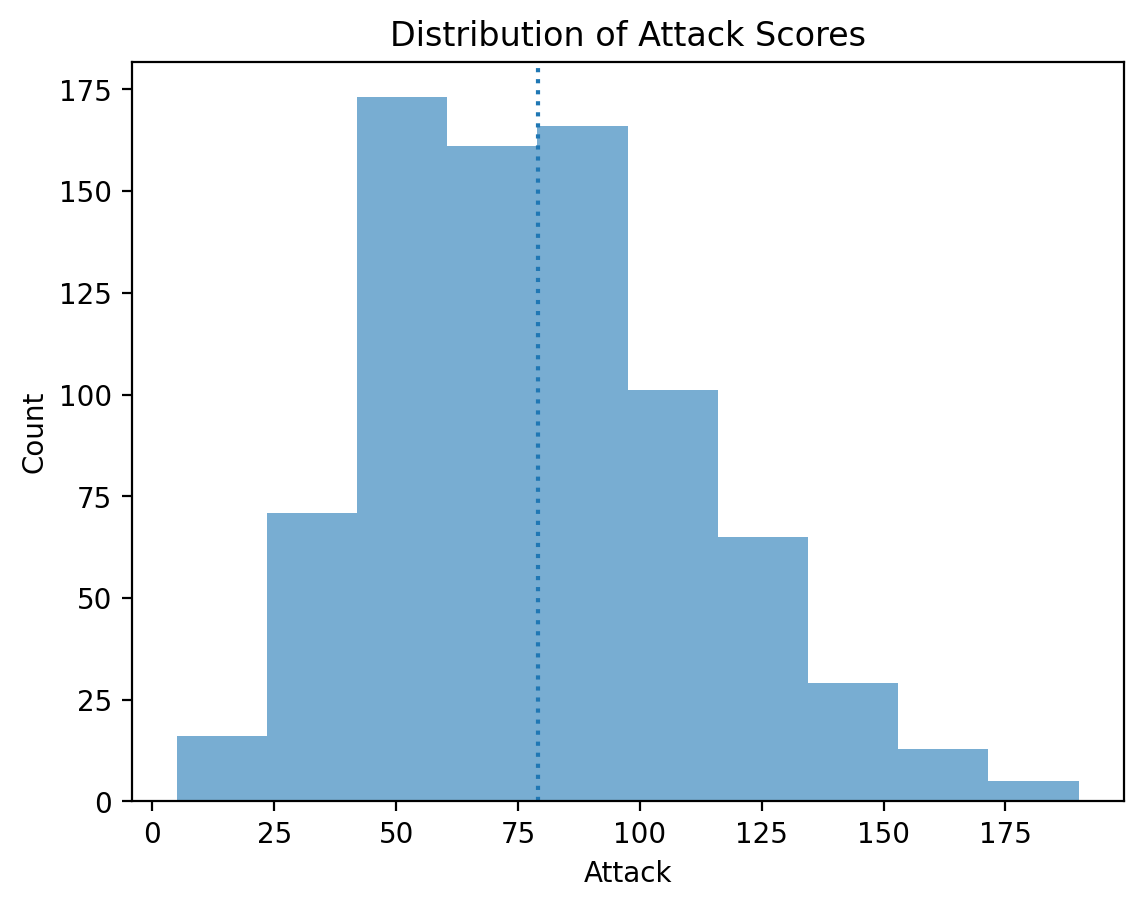

In [18]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Distribution of Attack Scores")
plt.axvline(df_pokemon['Attack'].mean(), linestyle = "dotted")

## Scatterplots

### What are scatterplots?

> A **scatterplot** is a visualization of how two different continuous distributions relate to each other.

- Each individual point represents an observation.
- Very useful for **exploratory data analysis**.
   - Are these variables positively or negatively correlated?
   
A scatterplot is a **bivariate** plot, i.e., it displays at least two variables.

### Scatterplots with `matplotlib`

We can create a scatterplot using `plt.scatter(x, y)`, where `x` and `y` are the two variables we want to visualize.

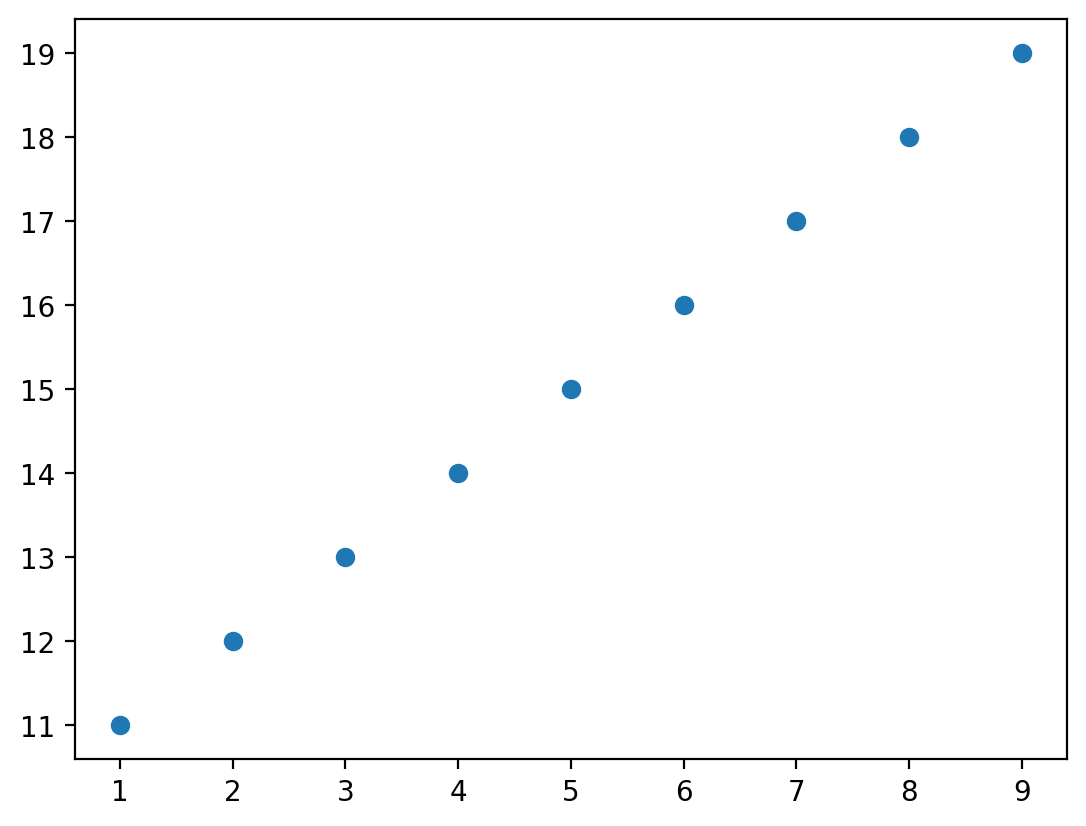

In [19]:
x = np.arange(1, 10)
y = np.arange(11, 20)
p = plt.scatter(x, y)

#### Check-in

Are these variables related? If so, how?

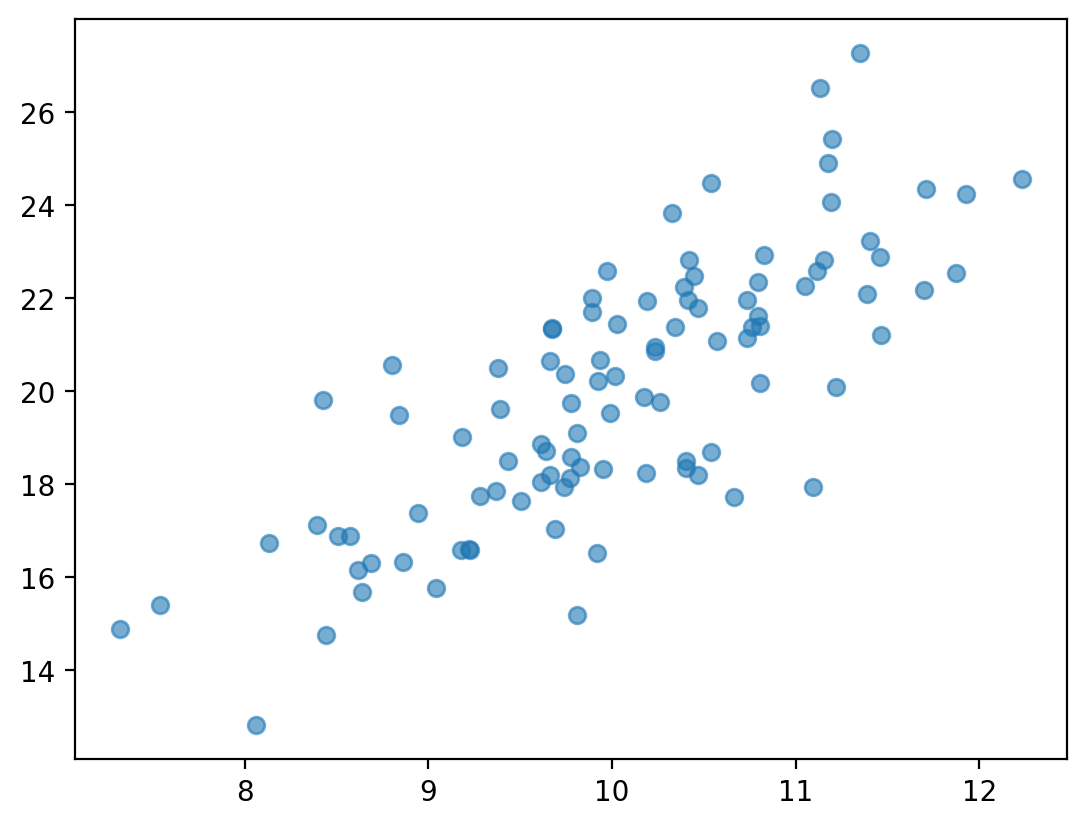

In [20]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#### Check-in

Are these variables related? If so, how?

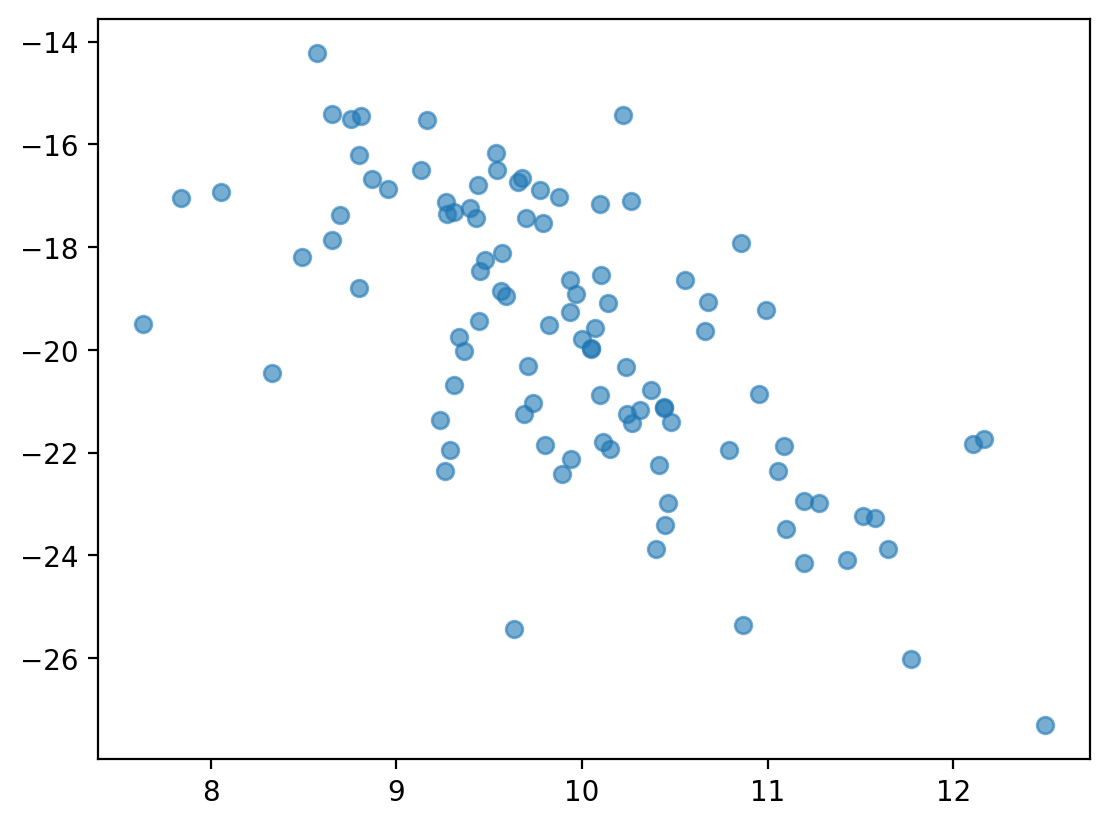

In [21]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = -x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#### Scatterplots are useful for detecting non-linear relationships

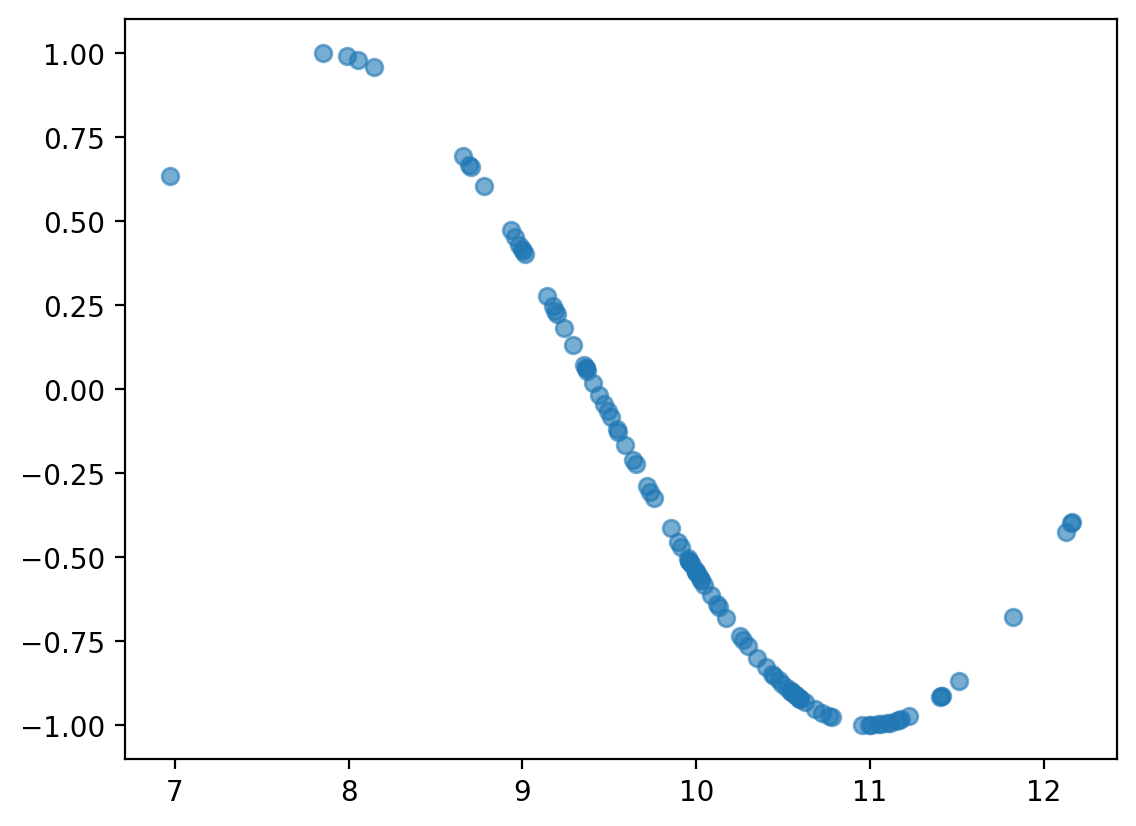

In [22]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = np.sin(x)
plt.scatter(x, y, alpha = .6);

#### Check-in

How would we visualize the relationship between `Attack` and `Speed` in our Pokemon dataset?

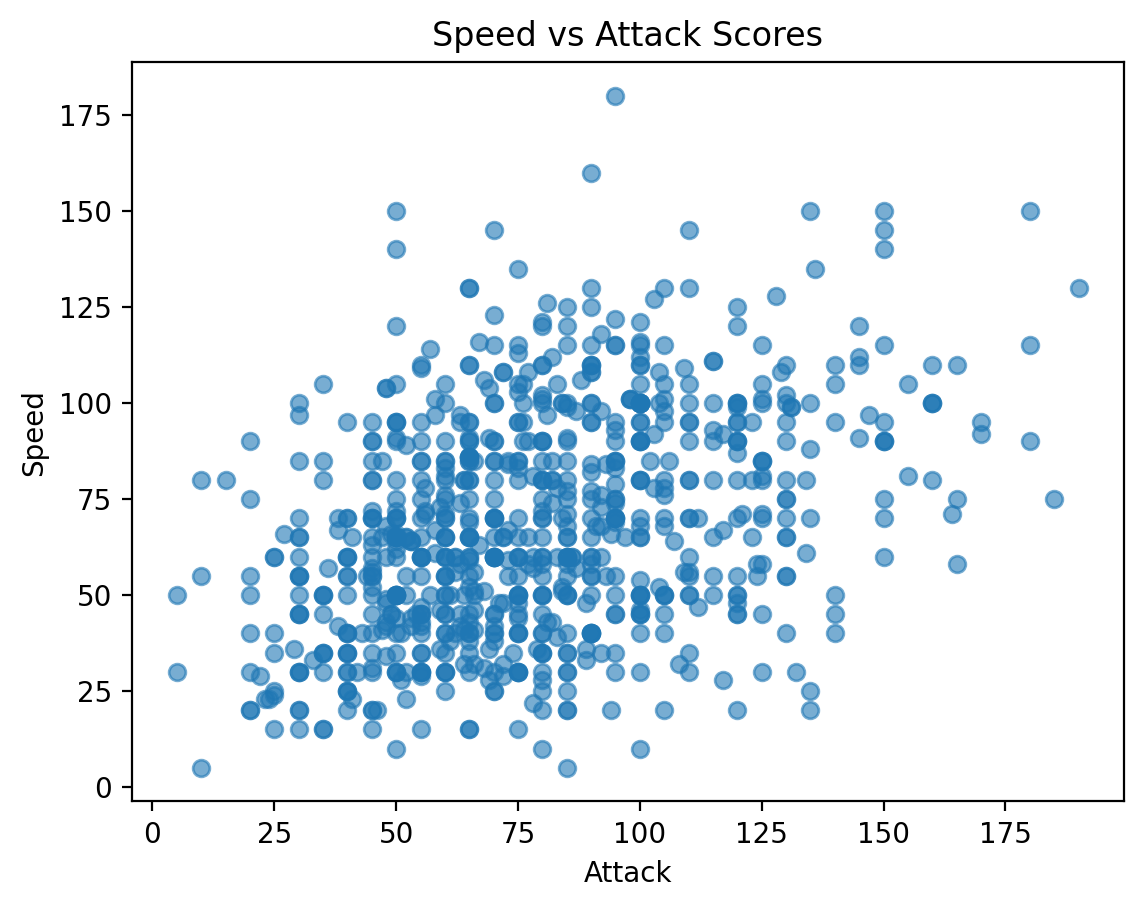

In [28]:
x = df_pokemon["Attack"]
y = df_pokemon["Speed"]
plt.xlabel("Attack")
plt.ylabel("Speed")
plt.title("Speed vs Attack Scores")
plt.scatter(x, y, alpha = .6);
 

## Barplots

### What is a barplot?

> A **barplot** visualizes the relationship between one *continuous* variable and a *categorical* variable.

- The *height* of each bar generally indicates the mean of the continuous variable.
- Each bar represents a different *level* of the categorical variable.

A barplot is a **bivariate** plot, i.e., it displays at least two variables.

### Barplots with `matplotlib`

`plt.bar` can be used to create a **barplot** of our data.

- E.g., average `Attack` by `Legendary` status.
- However, we first need to use `groupby` to calculate the mean `Attack` per level.

#### Step 1: Using `groupby`

In [24]:
summary = df_pokemon[['Legendary', 'Attack']].groupby("Legendary").mean().reset_index()
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


In [25]:
### Turn Legendary into a str
summary['Legendary'] = summary['Legendary'].apply(lambda x: str(x))
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


#### Step 2: Pass values into `plt.bar`

**Check-in**:

- What do we learn from this plot?  
- What is this plot missing?

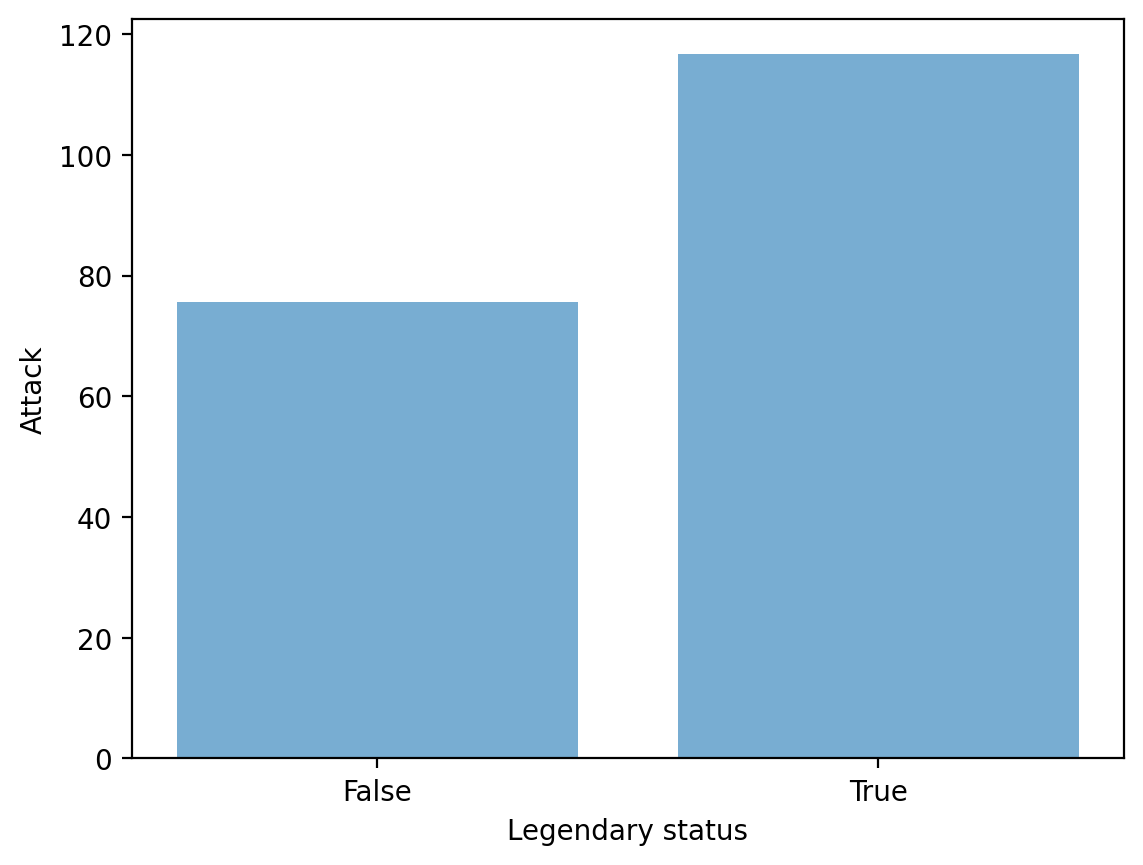

In [26]:
plt.bar(x = summary['Legendary'],height = summary['Attack'],alpha = .6);
plt.xlabel("Legendary status");
plt.ylabel("Attack");

## Conclusion

This concludes our first introduction to **data visualization**:

- Working with `matplotlib.pyplot`.  
- Creating basic plots: histograms, scatterplots, and barplots.

Next time, we'll move onto discussing `seaborn`, another very useful package for data visualization.